<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/BIC_scores_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

NG = 1, log(L) = -7958.742512336951, num_params = 5, BIC 15954.051126609354= 
151
NG = 2, log(L) = -7856.124378142278, num_params = 11, BIC 15792.69418054255= 
152
NG = 3, log(L) = -7718.369178525325, num_params = 17, BIC 15561.063103631184= 
153
NG = 4, log(L) = -7721.477778427544, num_params = 23, BIC 15611.159625758164= 
154
NG = 5, log(L) = -7721.179759255971, num_params = 29, BIC 15654.44290973756= 
155
...and the winner is GMM model G = 3


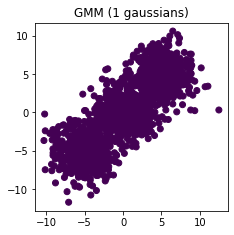

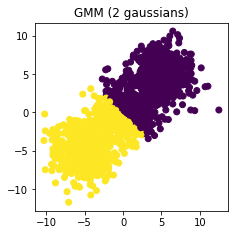

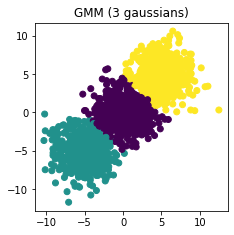

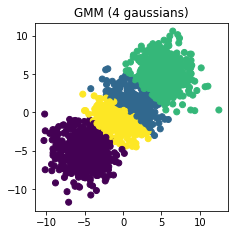

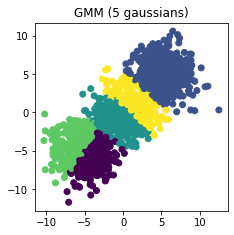

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import mixture
import numpy as np

n_clusters = 6
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=[[-5,-5],[0,0],[5,5]], cluster_std = [2,2,2], n_features=2,random_state=random_state)

NMAX = 5
bic = []
LL = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    LL.append(gmm.score(X))
    n_params = 2*kG + 3*kG + kG - 1
    BIC_theo = -2 * n_samples*gmm.score(X) + np.log(n_samples) * n_params
    #print('NG = {}, BIC = {}, n_params = {}, BIC_theo = {}'.format(kG,gmm.bic(X),n_params,BIC_theo))
    #print('NG = {}, log(L) = {}'.format(kG,n_samples*gmm.score(X)))
    print('NG = {}, log(L) = {}, num_params = {}, BIC {}= '.format(kG,n_samples*gmm.score(X),n_params,gmm.bic(X)))
    y_pred_gmm = gmm.fit_predict(X)

    place = str(1)+str(5)+str(kG)
    print(place)
    plt.figure(figsize=(20, 20))
    plt.title("Original data")
    plt.subplot(place)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
    plt.title("GMM ({} gaussians)".format(kG))
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axis('scaled')
    plt.savefig('GMM_models_{}G.png'.format(kG),bbox_inches='tight')



idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)



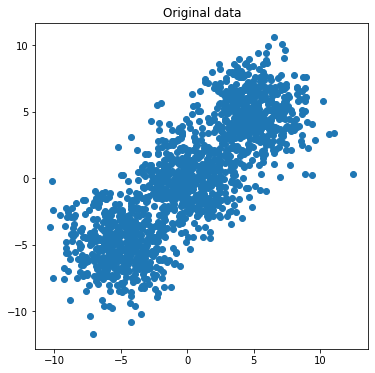

In [ ]:
fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original data")
plt.axis('scaled')
plt.show()

Text(0.5, 1.0, 'GMM clustering')

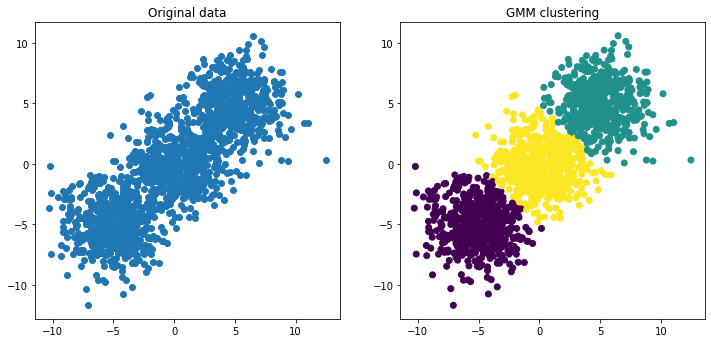

In [ ]:

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original data")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")

In [ ]:
place = str(1)+str(5)+str(kG)
print(place)


155


# Regression

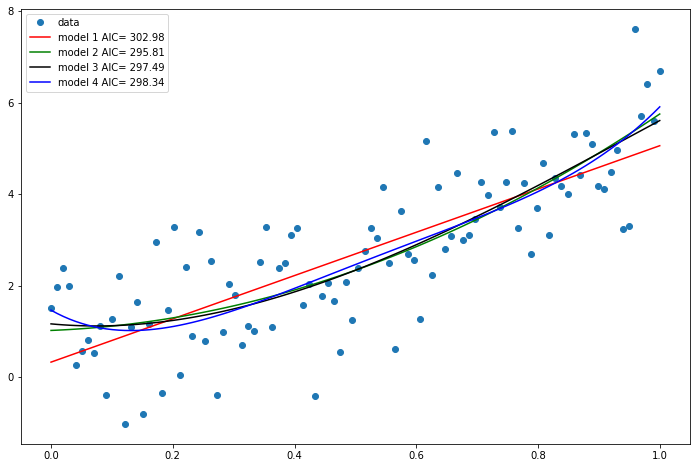

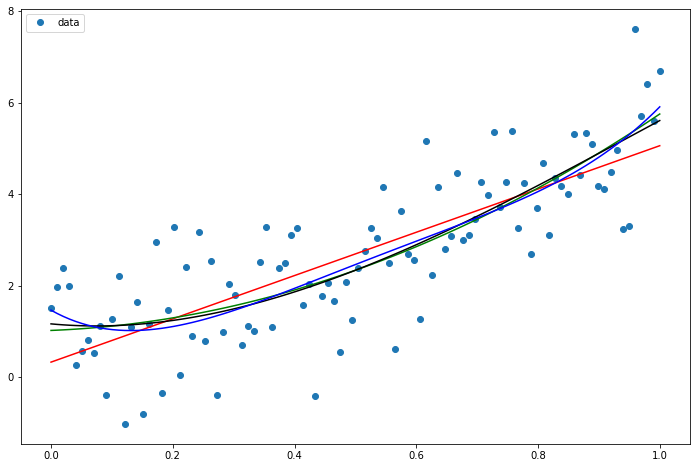

In [ ]:
import statsmodels.api as sm

nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = 1
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X**2, beta)
y = y_true + sig*e

model1 = sm.OLS(y, X)
results1 = model1.fit()

X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
results2 = model2.fit()

X3 = np.column_stack((x, x**2,x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
results3 = model3.fit()

X4 = np.column_stack((x, x**2,x**3,x**4))
X4 = sm.add_constant(X4) # adds a first column with ones
model4 = sm.OLS(y, X4)
results4 = model4.fit()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'o', label="data")
#ax.plot(x, y_true, 'k-', label="True")
ax.plot(x, results1.fittedvalues, 'r-', label="model 1 AIC= {:.5}".format(results1.aic))
ax.plot(x, results2.fittedvalues, 'g-', label="model 2 AIC= {:.5}".format(results2.aic))
ax.plot(x, results3.fittedvalues, 'k-', label="model 3 AIC= {:.5}".format(results3.aic))
ax.plot(x, results4.fittedvalues, 'b-', label="model 4 AIC= {:.5}".format(results4.aic))

ax.legend()
plt.show()


fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'o', label="data")
#ax.plot(x, y_true, 'k-', label="True")
ax.plot(x, results1.fittedvalues, 'r-')
ax.plot(x, results2.fittedvalues, 'g-')
ax.plot(x, results3.fittedvalues, 'k-')
ax.plot(x, results4.fittedvalues, 'b-')

ax.legend()
plt.show()

In [ ]:
print(-(results1.aic-2)/2)
print(-(results2.aic-3)/2)
print(-(results3.aic-4)/2)
print(-(results1.aic-5)/2)

-150.48821798995965
-146.403197735358
-146.74706389199991
-148.98821798995965


In [ ]:
print((-2)*(-(results1.aic-2)/2)+2)
print((-2)*(-(results2.aic-3)/2)+3)
print((-2)*(-(results3.aic-4)/2)+4)
print((-2)*(-(results4.aic-5)/2)+5)


302.9764359799193
295.806395470716
297.49412778399983
298.33525494115634
